In [1]:
import xarray as xr
import numpy as np
import xoak
from matplotlib import pyplot as plt
from cmocean import cm # for oceanography-specific colormaps
import tqdm
from itertools import zip_longest
from functools import reduce
from operator import add
from pathlib import Path

In [2]:
ds_traj = xr.open_zarr('/gxfs_work/geomar/smomw662/FESOMparcels_first/data/Parcels_run_1960-01-01.zarr')
ds_traj = ds_traj.compute()
ds_traj

<xarray.Dataset> Size: 6GB
Dimensions:     (trajectory: 10000, obs: 30000)
Coordinates:
  * obs         (obs) int32 120kB 0 1 2 3 4 5 ... 29995 29996 29997 29998 29999
  * trajectory  (trajectory) int64 80kB 0 1 2 3 4 5 ... 9995 9996 9997 9998 9999
Data variables:
    lat         (trajectory, obs) float32 1GB 15.13 15.14 15.14 ... 13.93 13.92
    lon         (trajectory, obs) float32 1GB 1.316 1.314 ... 0.1758 0.1913
    time        (trajectory, obs) datetime64[ns] 2GB 1960-01-01T23:50:00 ... ...
    z           (trajectory, obs) float32 1GB 1.257e+03 1.256e+03 ... 3.853e+03
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        JITParticleAdvectionRK4_3DperiodicBCCheckError
    parcels_mesh:           spherical
    parcels_version:        3.0.5

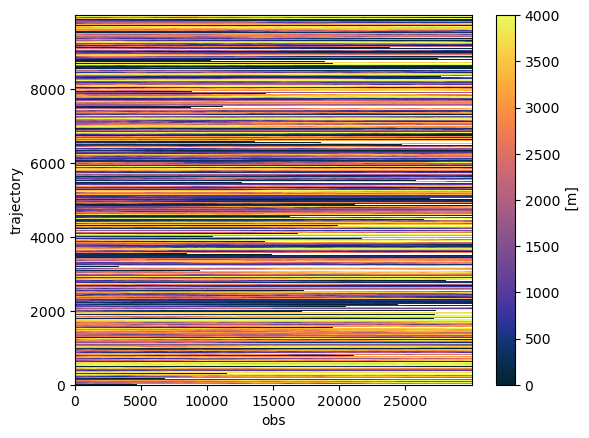

In [7]:
ds_traj.z.plot(vmin = 0, vmax = 4000, cmap=cm.thermal)

### Time series

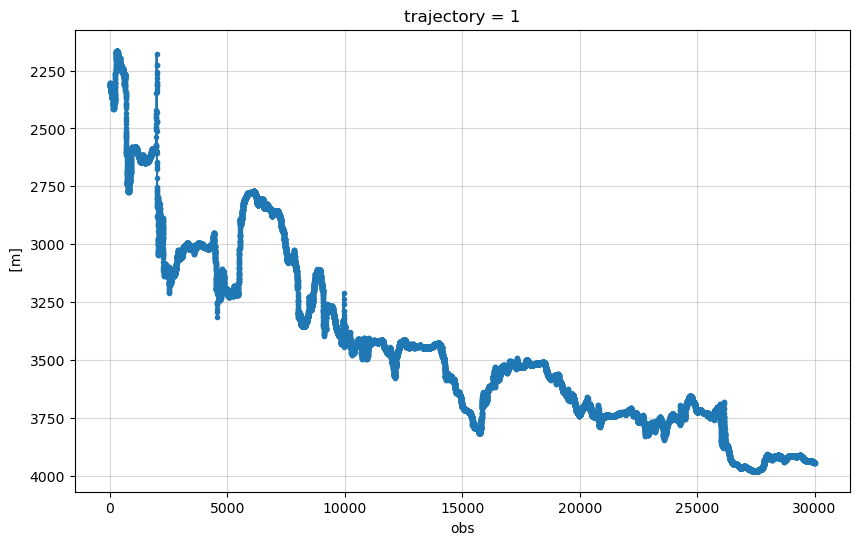

In [3]:
plt.figure(figsize=(10, 6))
ds_traj.isel(trajectory=1,obs=slice(0,30000)).z.plot(marker='.')
plt.gca().invert_yaxis()
plt.grid(alpha=0.5)
plt.show()

#### First derivate

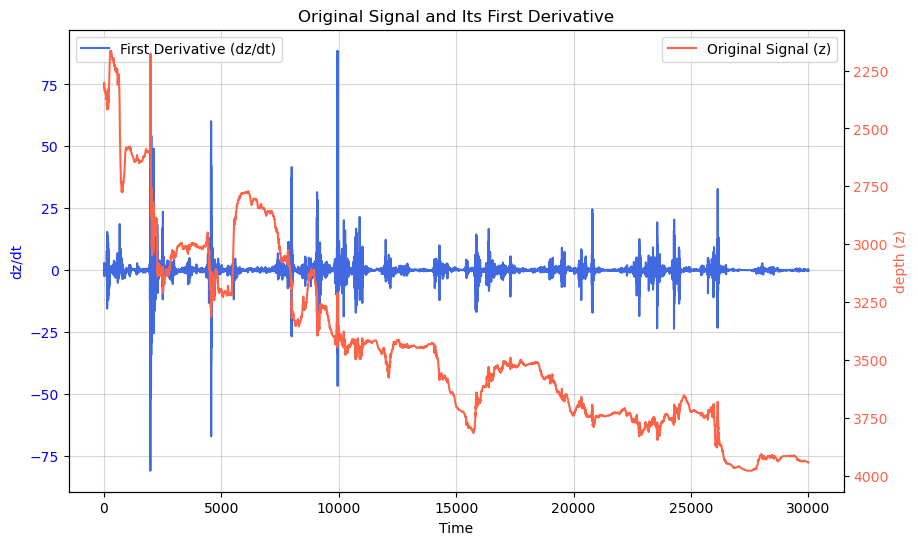

In [104]:
z_velocity = ds_traj.isel(trajectory=1).z  
dz_dt = np.gradient(z_velocity, edge_order=2) 

# Example data (replace with your z_velocity and dz_dt)
t = np.arange(len(z_velocity))  # Assuming t is the time index
dz_dt = np.gradient(z_velocity, edge_order=2)  # Compute first derivative

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the original signal
ax1.plot(t, dz_dt, 'royalblue', label='First Derivative (dz/dt)')
ax1.set_xlabel('Time')
ax1.set_ylabel('dz/dt', color='b')
ax1.tick_params(axis='y', labelcolor='b')
plt.grid(alpha=0.5)

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(t, z_velocity, color='#FF6347', label='Original Signal (z)')
ax2.set_ylabel('depth (z)', color='#FF6347')
ax2.tick_params(axis='y', labelcolor='#FF6347')
plt.gca().invert_yaxis()
# Add a legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Title and grid
plt.title('Original Signal and Its First Derivative')
#plt.grid(alpha=0.5)


# Show the plot
plt.show()

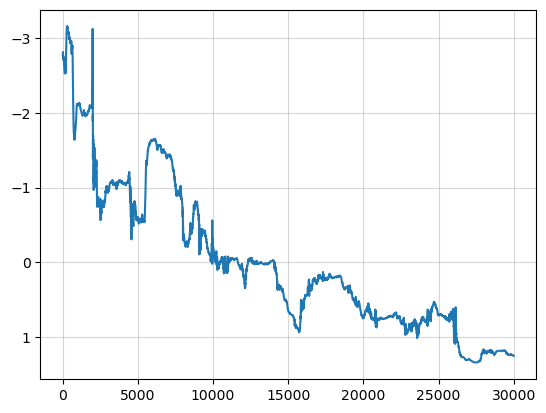

In [4]:
# ds_traj.isel(trajectory=1,obs=slice(0,30000)).z
# Normalize the w velocity
# z_velocity = ds_traj.isel(trajectory=1).z  # Replace with actual w data
z_normalized = (z_velocity - np.mean(z_velocity)) / np.std(z_velocity)

plt.plot(z_normalized.obs,z_normalized.values)
plt.gca().invert_yaxis()
plt.grid(alpha=0.5)
plt.show()

In [17]:
## let's grab an average of particles in the first 
#where((CUI_old_ts.lat >= -16) & (CUI_old_ts.lat<-5),drop=True)

filtered_particles=ds_traj.where((ds_traj.lat>=10) & (ds_traj.lat<12.5) & 
                                             (ds_traj.lon>=2) & (ds_traj.lon<3), drop=True).isel(obs=0)
filtered_particles


<xarray.Dataset> Size: 240kB
Dimensions:     (trajectory: 8588)
Coordinates:
    obs         int32 4B 0
  * trajectory  (trajectory) int64 69kB 0 1 2 3 4 5 ... 9995 9996 9997 9998 9999
Data variables:
    lat         (trajectory) float32 34kB nan nan 12.5 nan ... nan nan nan nan
    lon         (trajectory) float32 34kB nan nan 2.369 nan ... nan nan nan nan
    time        (trajectory) datetime64[ns] 69kB NaT NaT ... NaT NaT
    z           (trajectory) float32 34kB nan nan 653.9 nan ... nan nan nan nan
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        JITParticleAdvectionRK4_3DperiodicBCCheckError
    parcels_mesh:           spherical
    parcels_version:        3.0.5

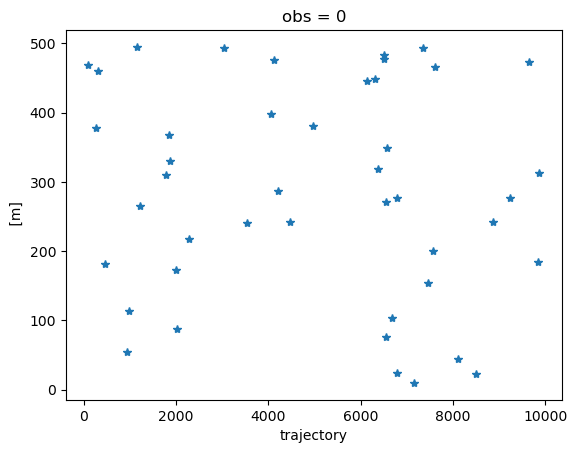

In [34]:
filtered_particles.where(filtered_particles.z<500).z.plot(marker="*")

In [45]:
R1=filtered_particles.where(filtered_particles.z<500,drop=True)
ind1=R1.trajectory.values
# indices = filtered.z.dropna(dim='trajectory').trajectory.values

In [46]:
ind1

array([ 105,  279,  317,  456,  949,  973, 1165, 1225, 1788, 1855, 1878,
       2001, 2024, 2276, 3046, 3542, 4071, 4115, 4203, 4481, 4973, 6142,
       6313, 6372, 6499, 6519, 6544, 6558, 6580, 6684, 6786, 6790, 7158,
       7360, 7463, 7562, 7613, 8107, 8495, 8875, 9236, 9642, 9837, 9875])

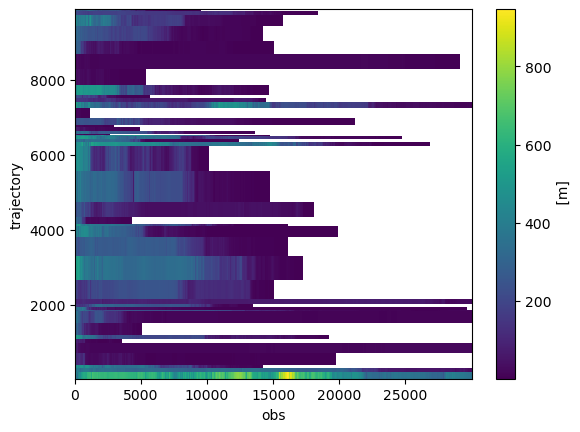

In [50]:
ds_traj.isel(trajectory=ind1).z.plot()

In [56]:
r1 = ds_traj.isel(trajectory=ind1)
r1

<xarray.Dataset> Size: 27MB
Dimensions:     (trajectory: 44, obs: 30000)
Coordinates:
  * obs         (obs) int32 120kB 0 1 2 3 4 5 ... 29995 29996 29997 29998 29999
  * trajectory  (trajectory) int64 352B 105 279 317 456 ... 9236 9642 9837 9875
Data variables:
    lat         (trajectory, obs) float32 5MB 11.23 11.25 11.28 ... nan nan nan
    lon         (trajectory, obs) float32 5MB 2.791 2.78 2.771 ... nan nan nan
    time        (trajectory, obs) datetime64[ns] 11MB 1960-01-01T23:50:00 ......
    z           (trajectory, obs) float32 5MB 469.4 469.8 470.4 ... nan nan nan
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        JITParticleAdvectionRK4_3DperiodicBCCheckError
    parcels_mesh:           spherical
    parcels_version:        3.0.5

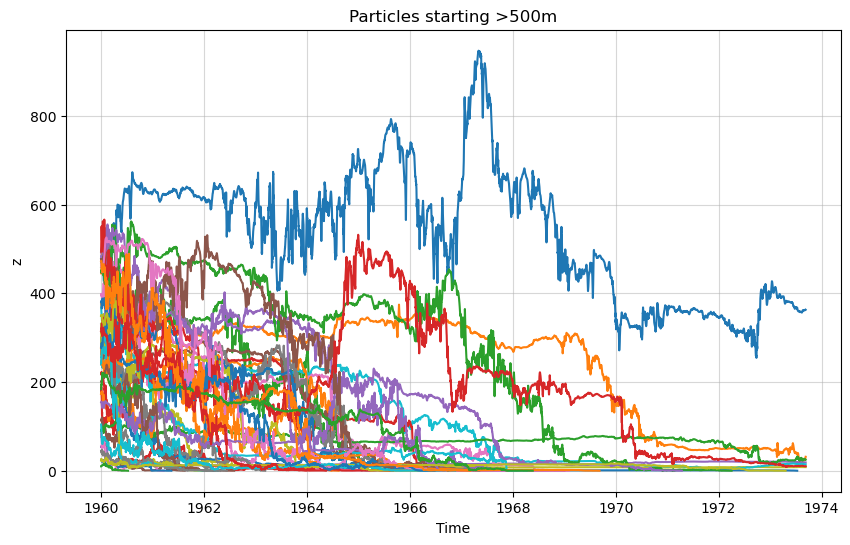

In [78]:
plt.figure(figsize=(10,6))

for i in range(len(ind1)):
    plt.plot(r1.time[0], r1.z.isel(trajectory=i), label=f'Trajectory {ind1[i]}')

plt.xlabel('Time')
plt.ylabel('z')
plt.title('Particles starting >500m')
plt.grid(alpha=0.5)

In [88]:
r1_filt=r1.dropna(dim='trajectory',subset=['z'])
r1_filt

<xarray.Dataset> Size: 4MB
Dimensions:     (trajectory: 7, obs: 30000)
Coordinates:
  * obs         (obs) int32 120kB 0 1 2 3 4 5 ... 29995 29996 29997 29998 29999
  * trajectory  (trajectory) int64 56B 105 279 949 1788 1855 2024 7360
Data variables:
    lat         (trajectory, obs) float32 840kB 11.23 11.25 ... 13.83 13.84
    lon         (trajectory, obs) float32 840kB 2.791 2.78 2.771 ... 2.207 2.217
    time        (trajectory, obs) datetime64[ns] 2MB 1960-01-01T23:50:00 ... ...
    z           (trajectory, obs) float32 840kB 469.4 469.8 470.4 ... 10.19 10.2
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        JITParticleAdvectionRK4_3DperiodicBCCheckError
    parcels_mesh:           spherical
    parcels_version:        3.0.5

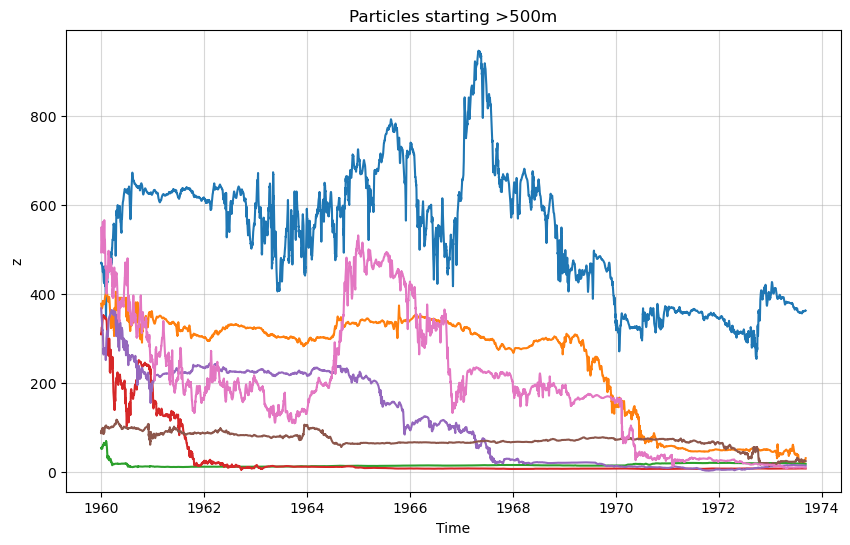

In [112]:
plt.figure(figsize=(10,6))

for i in range(7):
    plt.plot(r1.time[0], r1_filt.z.isel(trajectory=i), label=f'Trajectory {ind1[i]}')

plt.xlabel('Time')
plt.ylabel('z')
plt.title('Particles starting >500m')
plt.grid(alpha=0.5)

In [122]:
from sklearn.decomposition import PCA
z_data = r1_filt.z.values
print(z_data.shape)

z_data_normal = (z_data - np.mean(z_data, axis=1, keepdims=True)) / np.std(z_data, axis=1, keepdims=True)

pca = PCA(n_components=2)  # Extract only the first PC
transformed_data = pca.fit_transform(z_data_normal.T)  # Shape: (n_time_steps, n_components)

# Extract the first and second principal components
first_pc = transformed_data[:, 0]  # First principal component
second_pc = transformed_data[:, 1]  # Second principal component


(7, 30000)


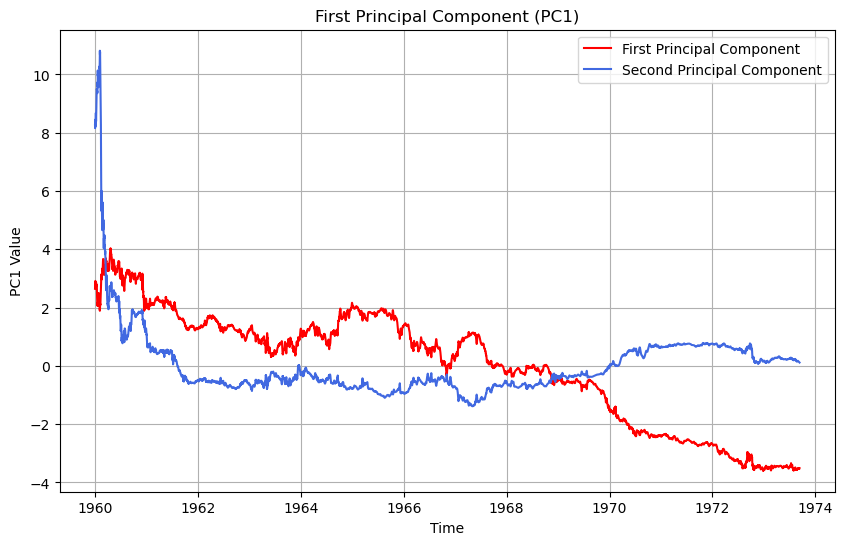

Explained variance by PC1: 54.02%
Explained variance by PC2: 21.15%


In [123]:
# time = ds_traj.time.values  # Assuming time is available in the dataset

plt.figure(figsize=(10, 6))
plt.plot(r1.time[0], first_pc, label='First Principal Component', color='r')
plt.plot(r1.time[0], second_pc, label='Second Principal Component', color='royalblue')
plt.title('First Principal Component (PC1)')
plt.xlabel('Time')
plt.ylabel('PC1 Value')
plt.legend()
plt.grid()
plt.show()

explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PC1: {explained_variance[0]:.2%}")
print(f"Explained variance by PC2: {explained_variance[1]:.2%}")

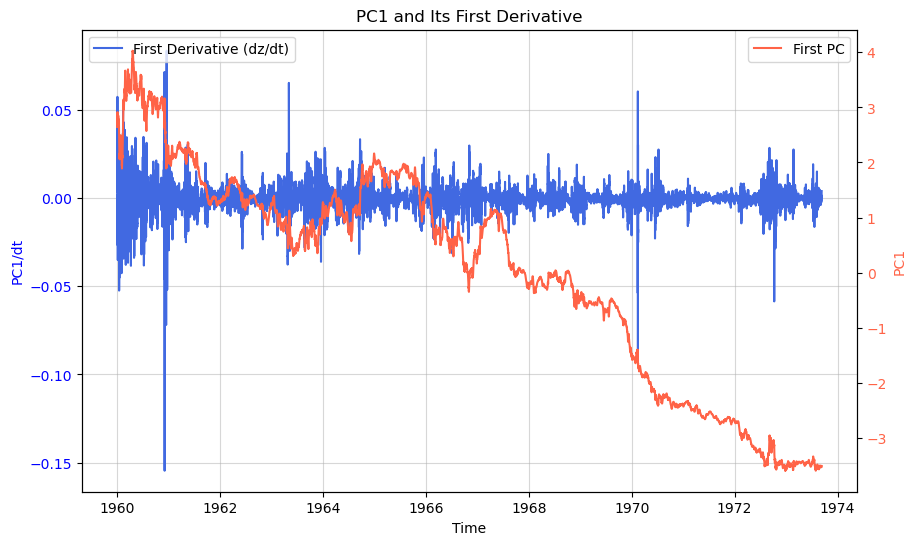

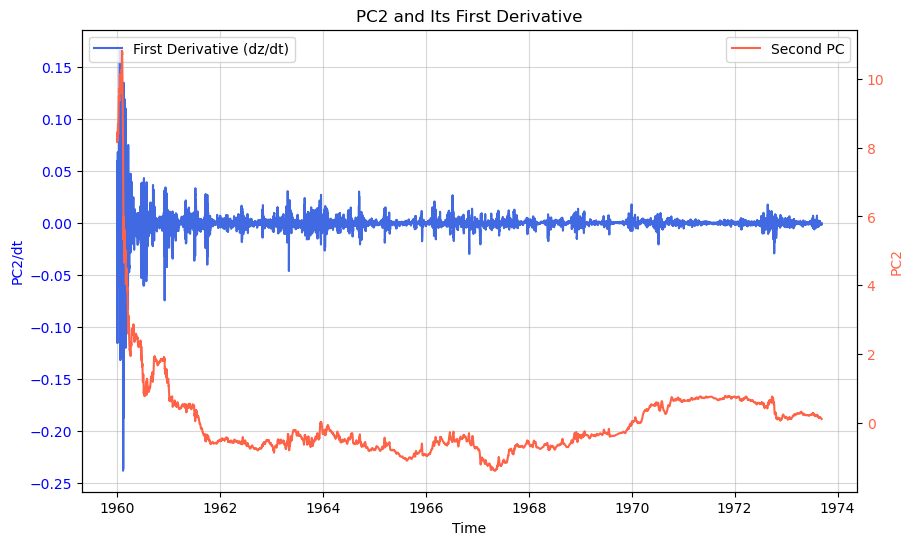

In [124]:
dz_dt = np.gradient(first_pc, edge_order=2) 
dz_dt2 = np.gradient(second_pc, edge_order=2) 

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the original signal
ax1.plot(r1.time[0], dz_dt, 'royalblue', label='First Derivative (dz/dt)')
ax1.set_xlabel('Time')
ax1.set_ylabel('PC1/dt', color='b')
ax1.tick_params(axis='y', labelcolor='b')
plt.grid(alpha=0.5)

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(r1.time[0], first_pc, color='#FF6347', label='First PC')
ax2.set_ylabel('PC1', color='#FF6347')
ax2.tick_params(axis='y', labelcolor='#FF6347')
# plt.gca().invert_yaxis()
# Add a legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Title and grid
plt.title('PC1 and Its First Derivative')
#plt.grid(alpha=0.5)
# plt.savefig('PC1.png',format='png', 
#             dpi=300, transparent=True,bbox_inches='tight')
# Show the plot
plt.show()


### segundo panel

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the original signal
ax1.plot(r1.time[0], dz_dt2, 'royalblue', label='First Derivative (dz/dt)')
ax1.set_xlabel('Time')
ax1.set_ylabel('PC2/dt', color='b')
ax1.tick_params(axis='y', labelcolor='b')
plt.grid(alpha=0.5)

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(r1.time[0], second_pc, color='#FF6347', label='Second PC')
ax2.set_ylabel('PC2', color='#FF6347')
ax2.tick_params(axis='y', labelcolor='#FF6347')
# plt.gca().invert_yaxis()
# Add a legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Title and grid
plt.title('PC2 and Its First Derivative')
#plt.grid(alpha=0.5)


# plt.savefig('PCs.png',format='png', 
#             dpi=300, transparent=True,bbox_inches='tight')

# Show the plot
plt.show()

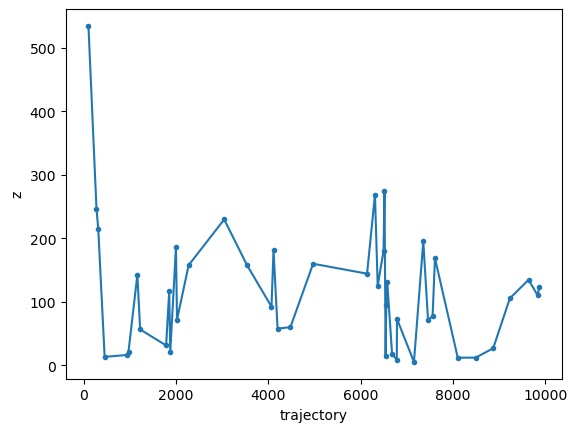

In [55]:
#mean(dim='lat', skipna=True)
ds_traj.isel(trajectory=ind1).z.mean(dim='obs',skipna=True).plot(marker='.')

### Wavelet Power mortlet

In [6]:
!pip install PyWavelets

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 44.9 MB/s eta 0:00:00


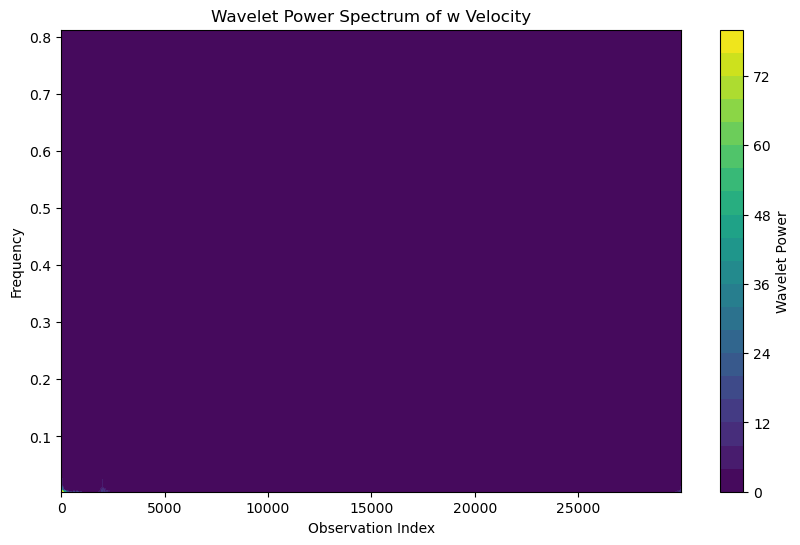

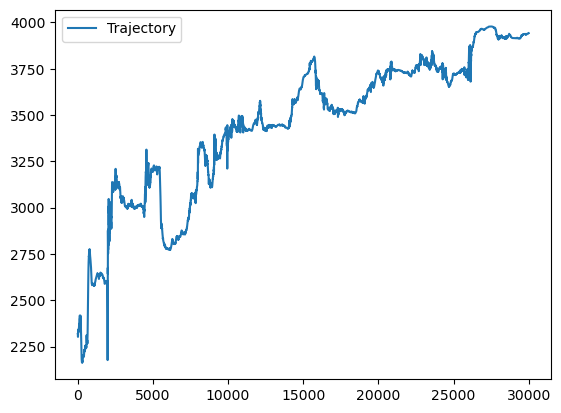

In [15]:
import pywt
# Perform Wavelet Transform
scales = np.arange(1, 256)  # Define scale range
coefficients, freqs = pywt.cwt(z_velocity, scales, 'morl')  # Morlet wavelet

# Compute Wavelet Power Spectrum
power = np.abs(coefficients) ** 2

# Plot Wavelet Power
plt.figure(figsize=(10, 6))
plt.contourf(range(z_normalized.size), freqs, power, levels=20, cmap='viridis')
plt.colorbar(label='Wavelet Power')
plt.title('Wavelet Power Spectrum of w Velocity')
plt.xlabel('Observation Index')
plt.ylabel('Frequency')
plt.show()

# Overlay trajectory peaks
z_trajectory = ds_traj.isel(trajectory=1).z
plt.plot(z_trajectory, label="Trajectory")
plt.legend()
plt.show()

### Unrolling of particles

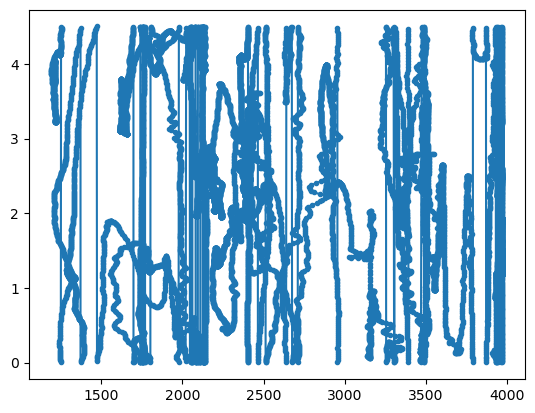

In [27]:
# ds_traj.isel(trajectory = 1000).plot(x='z',y='lon')
plt.plot(ds_traj.isel(trajectory = 1000).z, ds_traj.isel(trajectory = 1000).lon, marker='.')
## here I need to unroll

In [125]:
skip_this_step = abs(ds_traj.lon.diff('obs')) > 4.0
ds_traj_nowrap = ds_traj.where(~skip_this_step)